In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression


misdemeanor=pd.read_csv("./data/Misdemeanor_Rate_in_the_US.csv",encoding='utf-8')
misdemeanor=misdemeanor[misdemeanor['A']=='o']
misdemeanor=misdemeanor.filter(['State','Crimes','Misdemeanor_Rate','Result'])

misdemeanor

,State,Crimes,Misdemeanor_Rate,Result
0,Alabama,3360.9,36.0,1209.924
1,Alaska,4203.3,76.0,3194.508
2,Arizona,3168.2,80.0,2534.560
3,California,2833.7,80.0,2266.960
4,Connecticut,1871.5,81.0,1515.915
5,District of Columbia,5376.8,83.0,4462.744
6,Florida,2673.7,75.0,2005.275
7,Hawaii,3143.0,92.0,2891.560
8,Idaho,1714.8,78.0,1337.544
9,Illinois,2350.2,71.0,1668.642


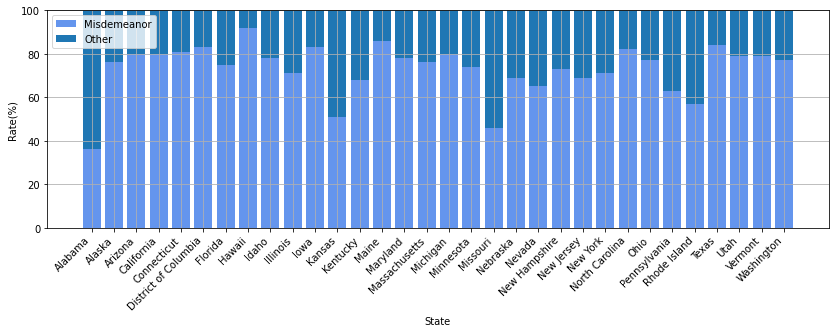

In [8]:
# 주 별 총 범죄중 경범죄의 비중을 보고자 barplot
plt.figure(figsize=(14,4))
plt.bar(misdemeanor['State'],misdemeanor['Misdemeanor_Rate'],color='cornflowerblue',label='Misdemeanor')
plt.bar(misdemeanor['State'],100-misdemeanor['Misdemeanor_Rate'],bottom=misdemeanor['Misdemeanor_Rate'],label='Other')
plt.grid(True)
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rate(%)')
plt.ylim(0,100)
plt.legend()
plt.show()

In [9]:
Data=pd.read_csv("./data/Test.csv",encoding='utf-8')
Data=Data[Data['A']=='v']

Traffic_data=Data.filter(['State','Traffic','Crimes','Misdemeanor_Rate','Misdemeanor_Result'])
Traffic_data=Traffic_data.sort_values(by='Misdemeanor_Result')
Traffic_data=Traffic_data.reset_index()

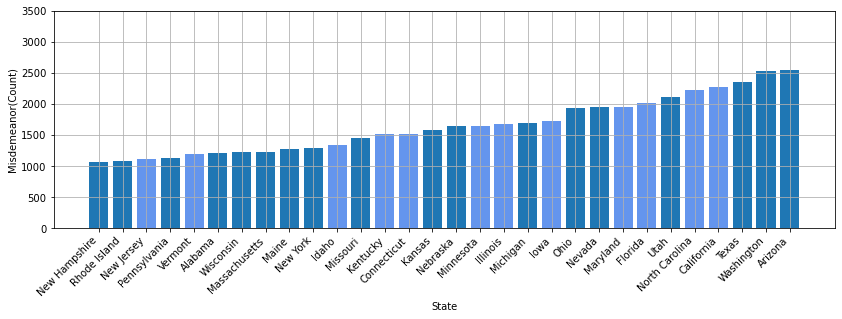

In [10]:
# 주 별 경범죄의 count를 보고자 bar plot

plt.figure(figsize=(14,4))

for i in range(len(Traffic_data)):
    if Traffic_data['Traffic'][i]==0.0:
        plt.bar(Traffic_data['State'][i],Traffic_data['Misdemeanor_Result'][i],color='cornflowerblue', label='no Traffic')
    else :
        plt.bar(Traffic_data['State'][i],Traffic_data['Misdemeanor_Result'][i], color='#1f77b4', label='Traffic') 
        
#plt.legend()
plt.ylim(0,3500)
plt.xlabel('State')
plt.ylabel('Misdemeanor(Count)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# GDP

In [82]:
GDP_data=Data.filter(['State','GDP','Misdemeanor_Rate','Misdemeanor_Result'])
GDP_data=GDP_data.sort_values(by='GDP')
GDP_data=GDP_data.reset_index()
#GDP_data

기울기 :  [0.00025126]
절편 :  1502.5932650532484


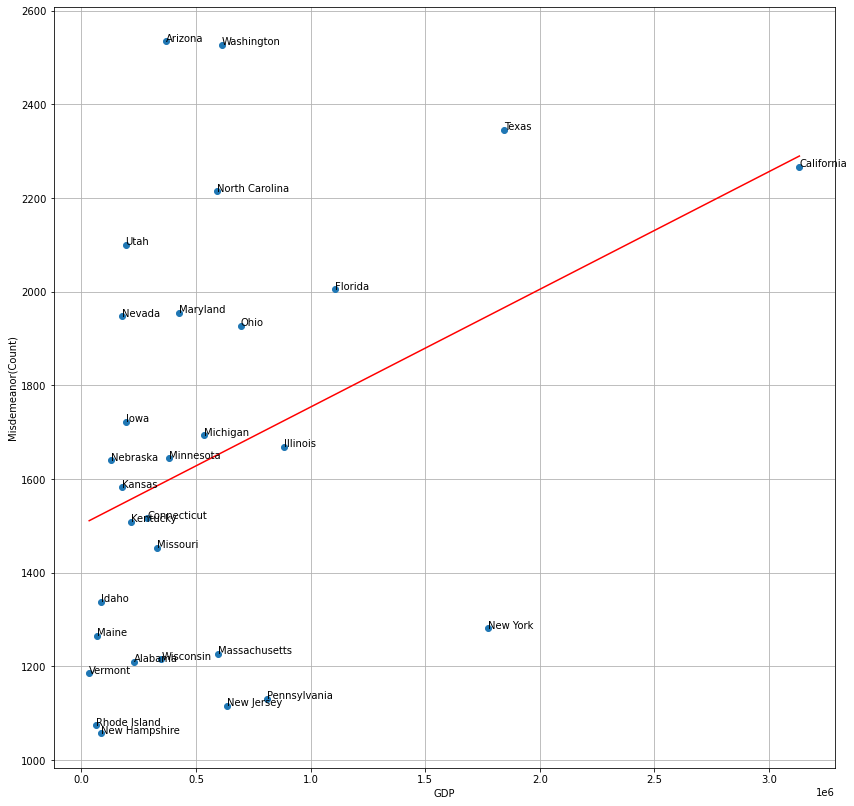

In [83]:
plt.figure(figsize=(14,14))
plt.plot(GDP_data['GDP'],GDP_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(GDP_data['State']):
    plt.annotate(txt, (GDP_data['GDP'][i], GDP_data['Misdemeanor_Result'][i]))


GDP_linear=LinearRegression()
GDP_linear.fit(GDP_data['GDP'].values.reshape(-1,1),GDP_data['Misdemeanor_Result'])
GDP_prediction=GDP_linear.predict(GDP_data['GDP'].values.reshape(-1,1))
plt.plot(GDP_data['GDP'],GDP_linear.predict(GDP_data['GDP'].values.reshape(-1,1)),color='r')

#plt.xscale('log')
#plt.yscale('log')  
print("기울기 : ",GDP_linear.coef_)
print("절편 : ",GDP_linear.intercept_)
plt.xlabel('GDP')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [7]:
print('Score : ',GDP_linear.score(GDP_data['GDP'].values.reshape(-1,1),GDP_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(GDP_prediction,GDP_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(GDP_prediction,GDP_data['Misdemeanor_Result'])**0.5)

Score :  0.1378495619307708
MSE :  166891.50066964116
RMSE :  408.5235619516225


In [8]:
GDP_body=pd.DataFrame({'Misdemeanor':GDP_data['Misdemeanor_Result'],'GDP':GDP_data['GDP']})
log_GDP_body=pd.DataFrame({'Misdemeanor':np.log(GDP_data['Misdemeanor_Result']),'GDP':np.log(GDP_data['GDP'])})

GDP_spearmanr_corr=stats.spearmanr(GDP_body.GDP,GDP_body.Misdemeanor)
log_GDP_spearmanr_corr=stats.spearmanr(log_GDP_body.GDP,log_GDP_body.Misdemeanor)
print('spearmanr_corr : {}'.format(GDP_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_GDP_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=0.40511679644048937, pvalue=0.02636271851016558)
log spearmanr_corr : SpearmanrResult(correlation=0.40511679644048937, pvalue=0.02636271851016558)


In [9]:
GDP_pearson_corr=GDP_body.corr(method='pearson')
GDP_pearson_corr

,Misdemeanor,GDP
Misdemeanor,1.000000,0.371281
GDP,0.371281,1.000000


In [10]:
log_GDP_pearson_corr=log_GDP_body.corr(method='pearson')
log_GDP_pearson_corr

,Misdemeanor,GDP
Misdemeanor,1.000000,0.449989
GDP,0.449989,1.000000


# Education(money)

In [84]:
Education_data=Data.filter(['State','Education','Education_Rank','Misdemeanor_Rate','Misdemeanor_Result'])
Education_data=Education_data.sort_values(by='Education')
Education_data=Education_data.reset_index()
#Education_data

기울기 :  [-0.05980062]
절편 :  2448.7653145700924


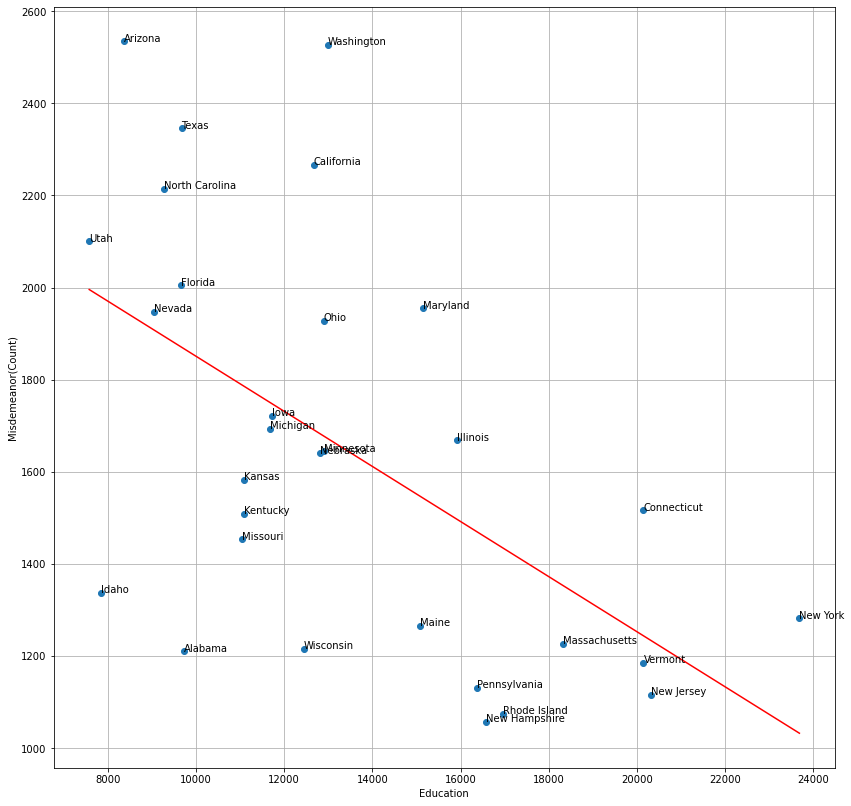

In [85]:
plt.figure(figsize=(14,14))
plt.plot(Education_data['Education'],Education_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Education_data['State']):
    plt.annotate(txt, (Education_data['Education'][i], Education_data['Misdemeanor_Result'][i]))


Education_linear=LinearRegression()
Education_linear.fit(Education_data['Education'].values.reshape(-1,1),Education_data['Misdemeanor_Result'])
Education_prediction=Education_linear.predict(Education_data['Education'].values.reshape(-1,1))
plt.plot(Education_data['Education'],Education_linear.predict(Education_data['Education'].values.reshape(-1,1)),color='r')

#plt.xscale('log')
#plt.yscale('log')
print("기울기 : ",Education_linear.coef_)
print("절편 : ",Education_linear.intercept_)
plt.xlabel('Education')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [13]:
print('score : ',Education_linear.score(Education_data['Education'].values.reshape(-1,1),Education_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Education_prediction,Education_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Education_prediction,Education_data['Misdemeanor_Result'])**0.5)

score :  0.31082931474201425
MSE :  133406.79862995623
RMSE :  365.2489543174028


In [14]:
Education_body=pd.DataFrame({'Misdemeanor':Education_data['Misdemeanor_Result'],'Education':Education_data['Education']})
log_Education_body=pd.DataFrame({'Misdemeanor':np.log(Education_data['Misdemeanor_Result']),'Education':np.log(Education_data['Education'])})

Education_spearmanr_corr=stats.spearmanr(Education_body.Education,Education_body.Misdemeanor)
log_Education_spearmanr_corr=stats.spearmanr(log_Education_body.Education,log_Education_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Education_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_Education_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.5617352614015573, pvalue=0.0012372342685145242)
log spearmanr_corr : SpearmanrResult(correlation=-0.5617352614015573, pvalue=0.0012372342685145242)


In [15]:
Education_pearson_corr=Education_body.corr(method='pearson')
Education_pearson_corr

,Misdemeanor,Education
Misdemeanor,1.000000,-0.557521
Education,-0.557521,1.000000


In [16]:
log_Education_pearson_corr=log_Education_body.corr(method='pearson')
log_Education_pearson_corr

,Misdemeanor,Education
Misdemeanor,1.000000,-0.571166
Education,-0.571166,1.000000


# Happy

In [17]:
Happy_data=Data.filter(['State','Happy','Misdemeanor_Rate','Misdemeanor_Result'])
Happy_data=Happy_data.sort_values(by='Happy')
Happy_data=Happy_data.reset_index()
#Happy_data

기울기 :  [8.64226913]
절편 :  1178.597549587838


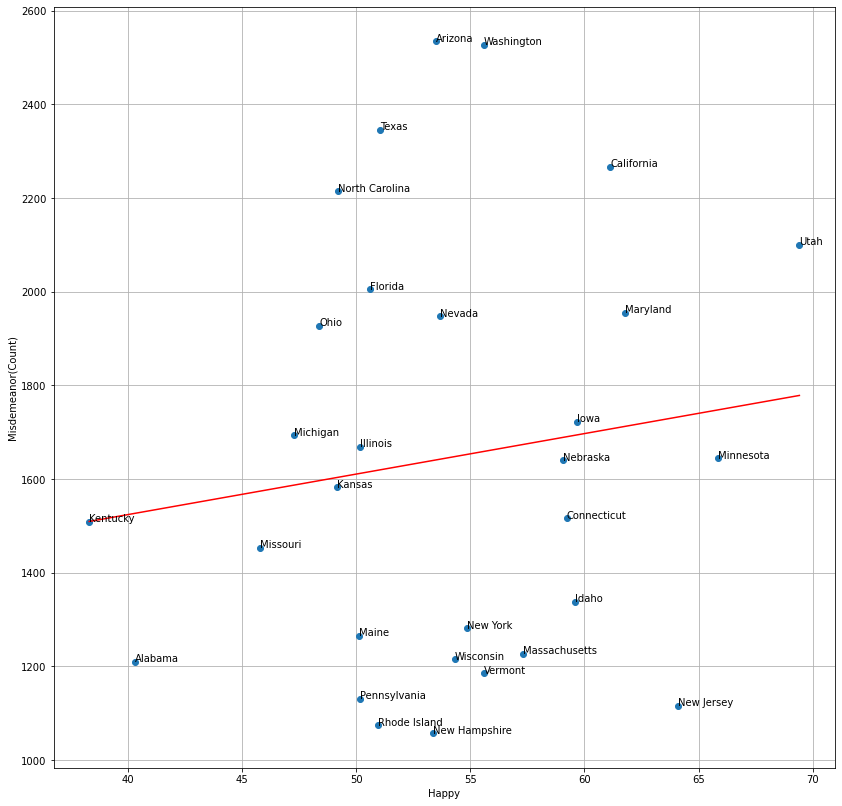

In [18]:
plt.figure(figsize=(14,14))
plt.plot(Happy_data['Happy'],Happy_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Happy_data['State']):
    plt.annotate(txt, (Happy_data['Happy'][i], Happy_data['Misdemeanor_Result'][i]))


Happy_linear=LinearRegression()
Happy_linear.fit(Happy_data['Happy'].values.reshape(-1,1),Happy_data['Misdemeanor_Result'])
Happy_prediction=Happy_linear.predict(Happy_data['Happy'].values.reshape(-1,1))
plt.plot(Happy_data['Happy'],Happy_linear.predict(Happy_data['Happy'].values.reshape(-1,1)),color='r')

#plt.xscale('log')
#plt.yscale('log')
print("기울기 : ",Happy_linear.coef_)
print("절편 : ",Happy_linear.intercept_)
plt.xlabel('Happy')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [19]:
print('score : ',Happy_linear.score(Happy_data['Happy'].values.reshape(-1,1),Happy_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Happy_prediction,Happy_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Happy_prediction,Happy_data['Misdemeanor_Result'])**0.5)

score :  0.018342834654548557
MSE :  190025.1165382499
RMSE :  435.9187040472683


In [20]:
Happy_body=pd.DataFrame({'Misdemeanor':Happy_data['Misdemeanor_Result'],'Happy':Happy_data['Happy']})
log_Happy_body=pd.DataFrame({'Misdemeanor':np.log(Happy_data['Misdemeanor_Result']),'Happy':np.log(Happy_data['Happy'])})

Happy_spearmanr_corr=stats.spearmanr(Happy_body.Happy,Happy_body.Misdemeanor)
log_Happy_spearmanr_corr=stats.spearmanr(log_Happy_body.Happy,log_Happy_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Happy_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_Happy_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=0.1239154616240267, pvalue=0.5141463019358128)
log spearmanr_corr : SpearmanrResult(correlation=0.1239154616240267, pvalue=0.5141463019358128)


In [21]:
Happy_pearson_corr=Happy_body.corr(method='pearson')
Happy_pearson_corr

,Misdemeanor,Happy
Misdemeanor,1.000000,0.135436
Happy,0.135436,1.000000


In [22]:
log_Happy_pearson_corr=log_Happy_body.corr(method='pearson')
log_Happy_pearson_corr

,Misdemeanor,Happy
Misdemeanor,1.000000,0.133227
Happy,0.133227,1.000000


# PCPI

In [23]:
PCPI_data=Data.filter(['State','PCPI','Misdemeanor_Rate','Misdemeanor_Result'])
PCPI_data=PCPI_data.sort_values(by='PCPI')
PCPI_data=PCPI_data.reset_index()
#PCPI_data

기울기 :  [-0.0087576]
절편 :  2137.05508631952


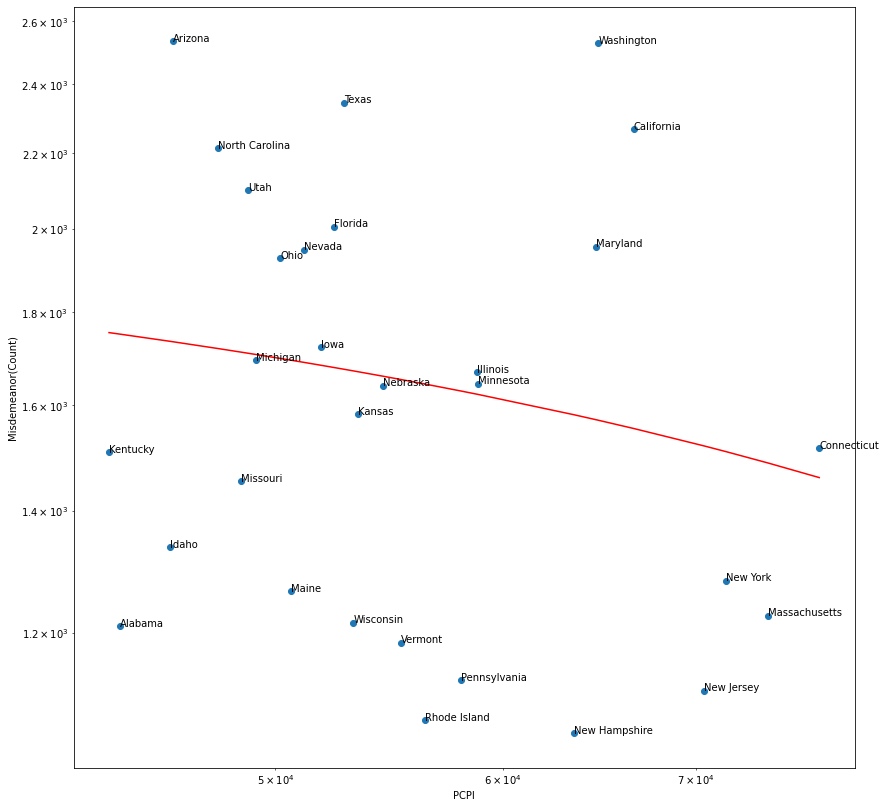

In [24]:
plt.figure(figsize=(14,14))
plt.plot(PCPI_data['PCPI'],PCPI_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(PCPI_data['State']):
    plt.annotate(txt, (PCPI_data['PCPI'][i], PCPI_data['Misdemeanor_Result'][i]))


PCPI_linear=LinearRegression()
PCPI_linear.fit(PCPI_data['PCPI'].values.reshape(-1,1),PCPI_data['Misdemeanor_Result'])
PCPI_prediction=PCPI_linear.predict(PCPI_data['PCPI'].values.reshape(-1,1))
plt.plot(PCPI_data['PCPI'],PCPI_linear.predict(PCPI_data['PCPI'].values.reshape(-1,1)),color='r')

plt.xscale('log')
plt.yscale('log')
print("기울기 : ",PCPI_linear.coef_)
print("절편 : ",PCPI_linear.intercept_)
plt.xlabel('PCPI')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [25]:
print('score : ',PCPI_linear.score(PCPI_data['PCPI'].values.reshape(-1,1),PCPI_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(PCPI_prediction,PCPI_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(PCPI_prediction,PCPI_data['Misdemeanor_Result'])**0.5)

score :  0.03208972645970953
MSE :  187364.05032335085
RMSE :  432.85569226169457


In [26]:
PCPI_body=pd.DataFrame({'Misdemeanor':PCPI_data['Misdemeanor_Result'],'PCPI':PCPI_data['PCPI']})
log_PCPI_body=pd.DataFrame({'Misdemeanor':np.log(PCPI_data['Misdemeanor_Result']),'PCPI':np.log(PCPI_data['PCPI'])})
                       
PCPI_spearmanr_corr=stats.spearmanr(PCPI_body.PCPI,PCPI_body.Misdemeanor)
log_PCPI_spearmanr_corr=stats.spearmanr(log_PCPI_body.PCPI,log_PCPI_body.Misdemeanor)
                       
print('spearmanr_corr : {}'.format(PCPI_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_PCPI_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.19733036707452725, pvalue=0.2959218602301394)
log spearmanr_corr : SpearmanrResult(correlation=-0.19733036707452725, pvalue=0.2959218602301394)


In [27]:
PCPI_pearson_corr=PCPI_body.corr(method='pearson')
PCPI_pearson_corr

,Misdemeanor,PCPI
Misdemeanor,1.000000,-0.179136
PCPI,-0.179136,1.000000


In [28]:
log_PCPI_pearson_corr=log_PCPI_body.corr(method='pearson')
log_PCPI_pearson_corr

,Misdemeanor,PCPI
Misdemeanor,1.000000,-0.192816
PCPI,-0.192816,1.000000


# Penalty

In [29]:
Penalty_data=Data.filter(['State','Penalty_mean','Misdemeanor_Rate','Misdemeanor_Result'])
Penalty_data['Penalty_mean']=round(Penalty_data['Penalty_mean'])
Penalty_data=Penalty_data.sort_values(by='Penalty_mean')
Penalty_data=Penalty_data.reset_index()
#Penalty_data

기울기 :  [-0.06042307]
절편 :  1750.1141630723218


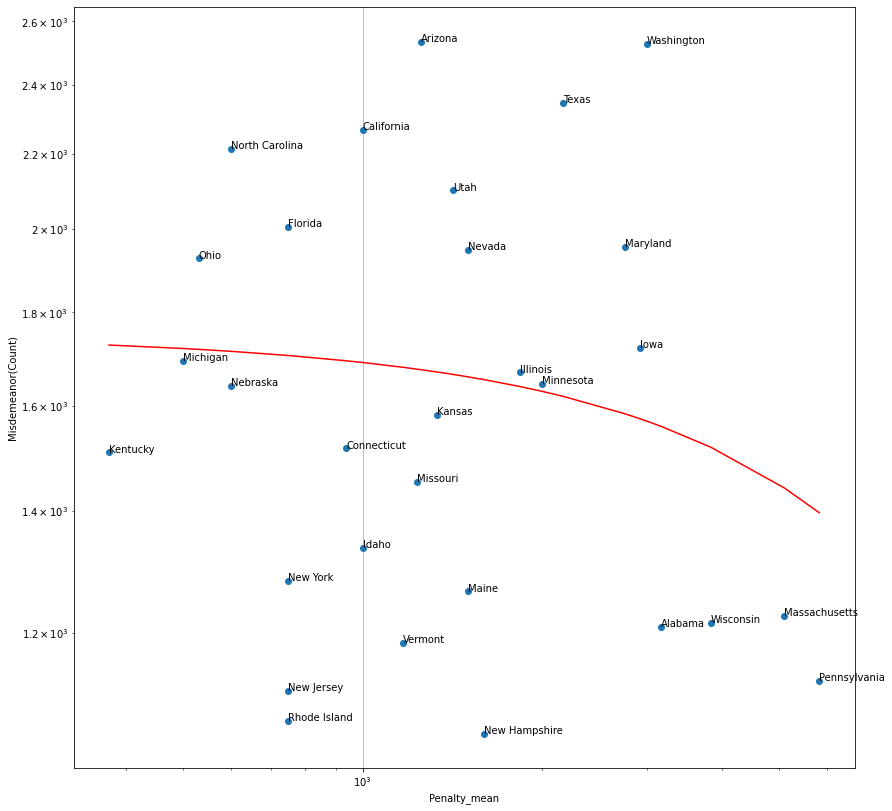

In [30]:
plt.figure(figsize=(14,14))
plt.plot(Penalty_data['Penalty_mean'],Penalty_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Penalty_data['State']):
    plt.annotate(txt, (Penalty_data['Penalty_mean'][i], Penalty_data['Misdemeanor_Result'][i]))


Penalty_linear=LinearRegression()
Penalty_linear.fit(Penalty_data['Penalty_mean'].values.reshape(-1,1),Penalty_data['Misdemeanor_Result'])
Penalty_prediction=Penalty_linear.predict(Penalty_data['Penalty_mean'].values.reshape(-1,1))
plt.plot(Penalty_data['Penalty_mean'],Penalty_linear.predict(Penalty_data['Penalty_mean'].values.reshape(-1,1)),color='r')

print("기울기 : ",Penalty_linear.coef_)
print("절편 : ",Penalty_linear.intercept_)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Penalty_mean')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [31]:
print('score : ',Penalty_linear.score(Penalty_data['Penalty_mean'].values.reshape(-1,1),Penalty_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Penalty_prediction,Penalty_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Penalty_prediction,Penalty_data['Misdemeanor_Result'])**0.5)

score :  0.03336048368051303
MSE :  187118.06241891778
RMSE :  432.57145354139794


In [32]:
Penalty_body=pd.DataFrame({'Misdemeanor':Penalty_data['Misdemeanor_Result'],'Penalty':Penalty_data['Penalty_mean']})
log_Penalty_body=pd.DataFrame({'Misdemeanor':np.log(Penalty_data['Misdemeanor_Result']),'Penalty':np.log(Penalty_data['Penalty_mean'])})

Penalty_spearmanr_corr=stats.spearmanr(Penalty_body.Penalty,Penalty_body.Misdemeanor)
log_Penalty_spearmanr_corr=stats.spearmanr(log_Penalty_body.Penalty,log_Penalty_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Penalty_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_Penalty_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.08087342778851078, pvalue=0.670955535909421)
log spearmanr_corr : SpearmanrResult(correlation=-0.08087342778851078, pvalue=0.670955535909421)


In [33]:
Penalty_pearson_corr=Penalty_body.corr(method='pearson')
Penalty_pearson_corr

,Misdemeanor,Penalty
Misdemeanor,1.000000,-0.182649
Penalty,-0.182649,1.000000


In [34]:
log_Penalty_pearson_corr=log_Penalty_body.corr(method='pearson')
log_Penalty_pearson_corr

,Misdemeanor,Penalty
Misdemeanor,1.00000,-0.12467
Penalty,-0.12467,1.00000


# GDP_Penalty

In [86]:
GDP_penalty_data=Data.filter(['State','GDP_penalty','Misdemeanor_Rate','Misdemeanor_Result'])
GDP_penalty_data['GDP_penalty']=round(GDP_penalty_data['GDP_penalty'],2)
GDP_penalty_data=GDP_penalty_data.sort_values(by='GDP_penalty')
GDP_penalty_data=GDP_penalty_data.reset_index()
#GDP_penalty_data

기울기 :  [0.1838811]
절편 :  1547.617032106014


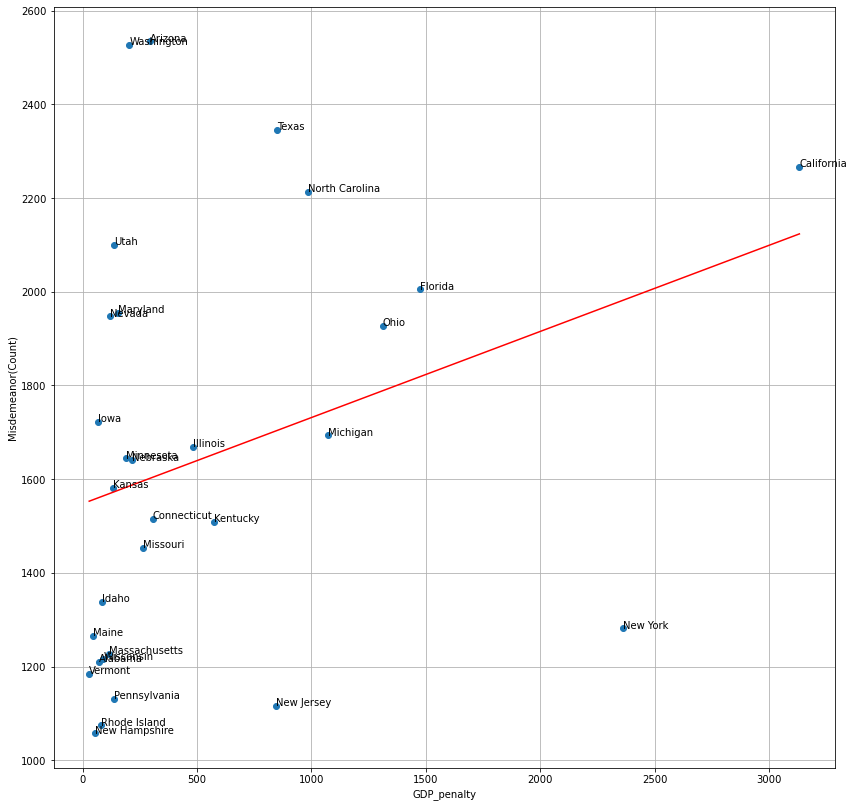

In [87]:
plt.figure(figsize=(14,14))
plt.plot(GDP_penalty_data['GDP_penalty'],GDP_penalty_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(GDP_penalty_data['State']):
    plt.annotate(txt, (GDP_penalty_data['GDP_penalty'][i], GDP_penalty_data['Misdemeanor_Result'][i]))


GDP_penalty_linear=LinearRegression()
GDP_penalty_linear.fit(GDP_penalty_data['GDP_penalty'].values.reshape(-1,1),GDP_penalty_data['Misdemeanor_Result'])
GDP_penalty_prediction=GDP_penalty_linear.predict(GDP_penalty_data['GDP_penalty'].values.reshape(-1,1))
plt.plot(GDP_penalty_data['GDP_penalty'],GDP_penalty_linear.predict(GDP_penalty_data['GDP_penalty'].values.reshape(-1,1)),color='r')

print("기울기 : ",GDP_penalty_linear.coef_)
print("절편 : ",GDP_penalty_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('GDP_penalty')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [37]:
print('score : ',GDP_penalty_linear.score(GDP_penalty_data['GDP_penalty'].values.reshape(-1,1),GDP_penalty_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(GDP_penalty_prediction,GDP_penalty_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(GDP_penalty_prediction,GDP_penalty_data['Misdemeanor_Result'])**0.5)

score :  0.09035224415995569
MSE :  176085.83415314127
RMSE :  419.6258263657532


In [38]:
GDP_penalty_body=pd.DataFrame({'Misdemeanor':GDP_penalty_data['Misdemeanor_Result'],'GDP_penalty':GDP_penalty_data['GDP_penalty']})
log_GDP_penalty_body=pd.DataFrame({'Misdemeanor':np.log(GDP_penalty_data['Misdemeanor_Result']),'GDP_penalty':np.log(GDP_penalty_data['GDP_penalty'])})

GDP_penalty_spearmanr_corr=stats.spearmanr(GDP_penalty_body.GDP_penalty,GDP_penalty_body.Misdemeanor)
log_GDP_penalty_spearmanr_corr=stats.spearmanr(log_GDP_penalty_body.GDP_penalty,log_GDP_penalty_body.Misdemeanor)

print('spearmanr_corr : {}'.format(GDP_penalty_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_GDP_penalty_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=0.5114571746384872, pvalue=0.0038681721623063095)
log spearmanr_corr : SpearmanrResult(correlation=0.5114571746384872, pvalue=0.0038681721623063095)


In [39]:
GDP_penalty_pearson_corr=GDP_penalty_body.corr(method='pearson')
GDP_penalty_pearson_corr

,Misdemeanor,GDP_penalty
Misdemeanor,1.000000,0.300587
GDP_penalty,0.300587,1.000000


In [40]:
log_GDP_penalty_pearson_corr=log_GDP_penalty_body.corr(method='pearson')
log_GDP_penalty_pearson_corr

,Misdemeanor,GDP_penalty
Misdemeanor,1.00000,0.45839
GDP_penalty,0.45839,1.00000


# Area_Police

In [41]:
Police_area_data=Data.filter(['State','Police_area','Misdemeanor_Result'])
Police_area_data=Police_area_data.sort_values(by='Police_area')
Police_area_data=Police_area_data.reset_index()
#Police_area_data

기울기 :  [333.3423111]
절편 :  1339.2739615328537


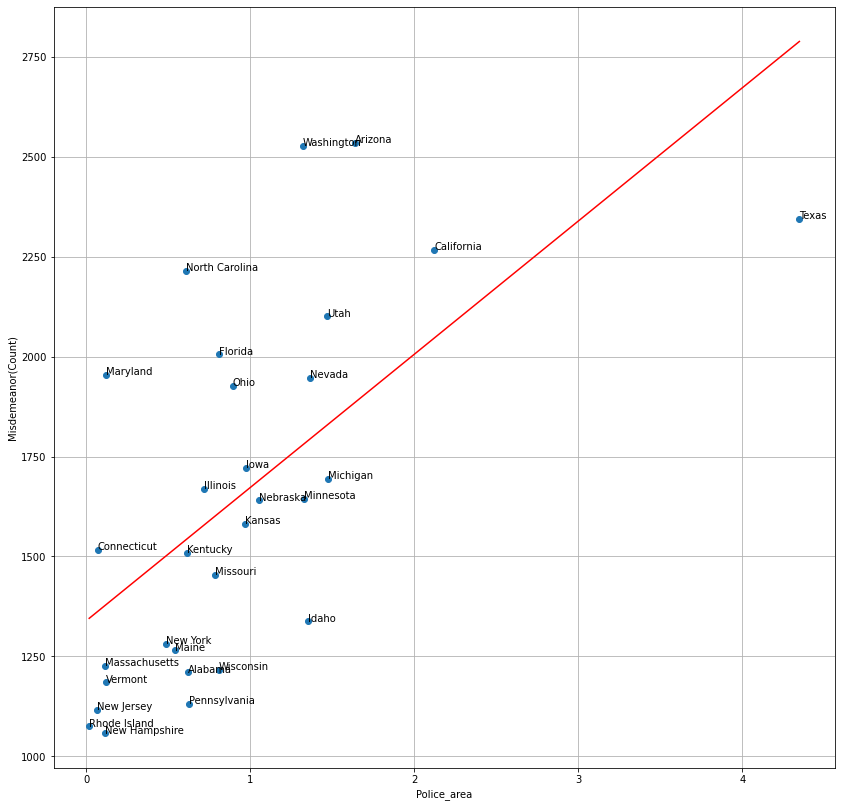

In [42]:
plt.figure(figsize=(14,14))
plt.plot(Police_area_data['Police_area'],Police_area_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Police_area_data['State']):
    plt.annotate(txt, (Police_area_data['Police_area'][i], Police_area_data['Misdemeanor_Result'][i]))


Police_area_linear=LinearRegression()
Police_area_linear.fit(Police_area_data['Police_area'].values.reshape(-1,1),Police_area_data['Misdemeanor_Result'])
Police_area_prediction=Police_area_linear.predict(Police_area_data['Police_area'].values.reshape(-1,1))
plt.plot(Police_area_data['Police_area'],Police_area_linear.predict(Police_area_data['Police_area'].values.reshape(-1,1)),color='r')

print("기울기 : ",Police_area_linear.coef_)
print("절편 : ",Police_area_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Police_area')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [43]:
print('score : ',Police_area_linear.score(Police_area_data['Police_area'].values.reshape(-1,1),Police_area_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Police_area_prediction,Police_area_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Police_area_prediction,Police_area_data['Misdemeanor_Result'])**0.5)

score :  0.3957080889438761
MSE :  116976.31808264962
RMSE :  342.0180084186352


In [44]:
Police_area_body=pd.DataFrame({'Misdemeanor':Police_area_data['Misdemeanor_Result'],'Police_area':Police_area_data['Police_area']})
log_Police_area_body=pd.DataFrame({'Misdemeanor':np.log(Police_area_data['Misdemeanor_Result']),'Police_area':np.log(Police_area_data['Police_area'])})

Police_area_spearmanr_corr=stats.spearmanr(Police_area_body.Police_area,Police_area_body.Misdemeanor)
log_Police_area_spearmanr_corr=stats.spearmanr(log_Police_area_body.Police_area,log_Police_area_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Police_area_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_Police_area_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=0.7023359288097887, pvalue=1.5167164092987876e-05)
log spearmanr_corr : SpearmanrResult(correlation=0.7023359288097887, pvalue=1.5167164092987876e-05)


In [45]:
Police_area_pearson_corr=Police_area_body.corr(method='pearson')
Police_area_pearson_corr

,Misdemeanor,Police_area
Misdemeanor,1.000000,0.629053
Police_area,0.629053,1.000000


In [46]:
log_Police_area_pearson_corr=log_Police_area_body.corr(method='pearson')
log_Police_area_pearson_corr

,Misdemeanor,Police_area
Misdemeanor,1.000000,0.629528
Police_area,0.629528,1.000000


# MSA

In [47]:
MSA_data=Data.filter(['State','Misdemeanor_Result','MSA_Rate'])
MSA_data=MSA_data.sort_values(by='MSA_Rate')
MSA_data=MSA_data.reset_index()
#MSA_data

기울기 :  [9.58642127]
절편 :  866.7959235457695


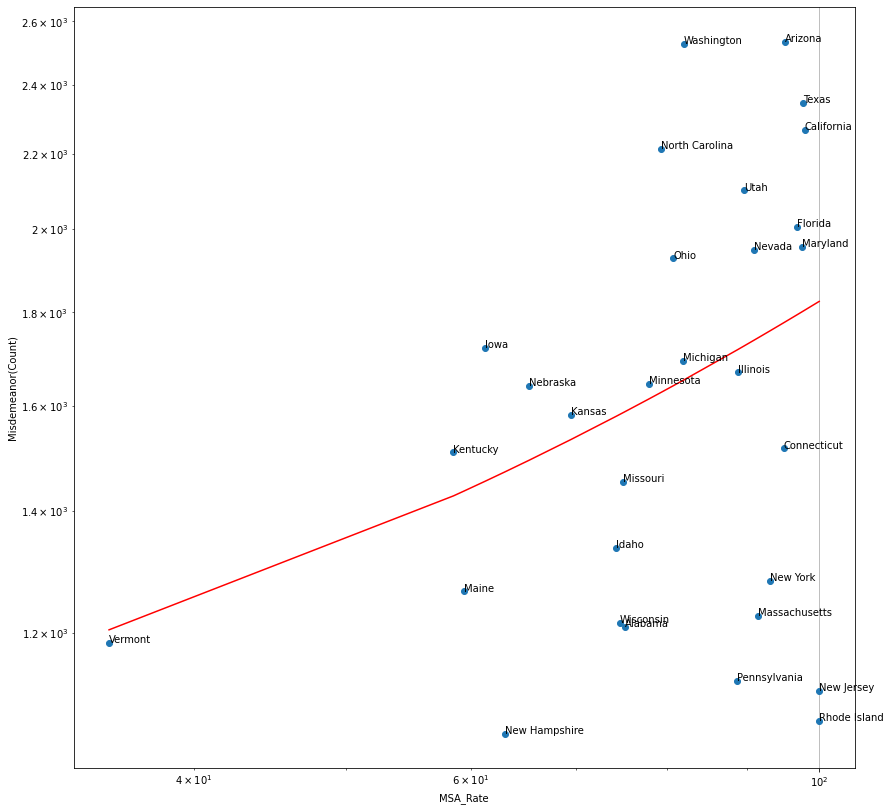

In [48]:
plt.figure(figsize=(14,14))
plt.plot(MSA_data['MSA_Rate'],MSA_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(MSA_data['State']):
    plt.annotate(txt, (MSA_data['MSA_Rate'][i], MSA_data['Misdemeanor_Result'][i]))


MSA_linear=LinearRegression()
MSA_linear.fit(MSA_data['MSA_Rate'].values.reshape(-1,1),MSA_data['Misdemeanor_Result'])
MSA_prediction=MSA_linear.predict(MSA_data['MSA_Rate'].values.reshape(-1,1))
plt.plot(MSA_data['MSA_Rate'],MSA_linear.predict(MSA_data['MSA_Rate'].values.reshape(-1,1)),color='r')

print("기울기 : ",MSA_linear.coef_)
print("절편 : ",MSA_linear.intercept_)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MSA_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [49]:
print('score : ',MSA_linear.score(MSA_data['MSA_Rate'].values.reshape(-1,1),MSA_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(MSA_prediction,MSA_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(MSA_prediction,MSA_data['Misdemeanor_Result'])**0.5)

score :  0.11163667165635094
MSE :  171965.6830879482
RMSE :  414.68745229141933


In [50]:
MSA_body=pd.DataFrame({'Misdemeanor':MSA_data['Misdemeanor_Result'],'MSA':MSA_data['MSA_Rate']})
log_MSA_body=pd.DataFrame({'Misdemeanor':np.log(MSA_data['Misdemeanor_Result']),'MSA':np.log(MSA_data['MSA_Rate'])})

MSA_spearmanor_corr=stats.spearmanr(MSA_body.MSA,MSA_body.Misdemeanor)
log_MSA_spearmanor_corr=stats.spearmanr(log_MSA_body.MSA,log_MSA_body.Misdemeanor)

print('spearmanr_corr : {}'.format(MSA_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_MSA_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=0.29057737414205614, pvalue=0.1192903423759865)
log spearmanr_corr : SpearmanrResult(correlation=0.29057737414205614, pvalue=0.1192903423759865)


In [51]:
MSA_pearson_corr=MSA_body.corr(method='pearson')
MSA_pearson_corr

,Misdemeanor,MSA
Misdemeanor,1.000000,0.334121
MSA,0.334121,1.000000


In [52]:
log_MSA_pearson_corr=log_MSA_body.corr(method='pearson')
log_MSA_pearson_corr

,Misdemeanor,MSA
Misdemeanor,1.000000,0.319626
MSA,0.319626,1.000000


# Old_Rate

In [88]:
Old_age_data=Data.filter(['State','Misdemeanor_Result','older_rate'])
Old_age_data=Old_age_data.sort_values(by='older_rate')
Old_age_data=Old_age_data.reset_index()
#Old_age_data

기울기 :  [-100.93796592]
절편 :  3361.0382539611364


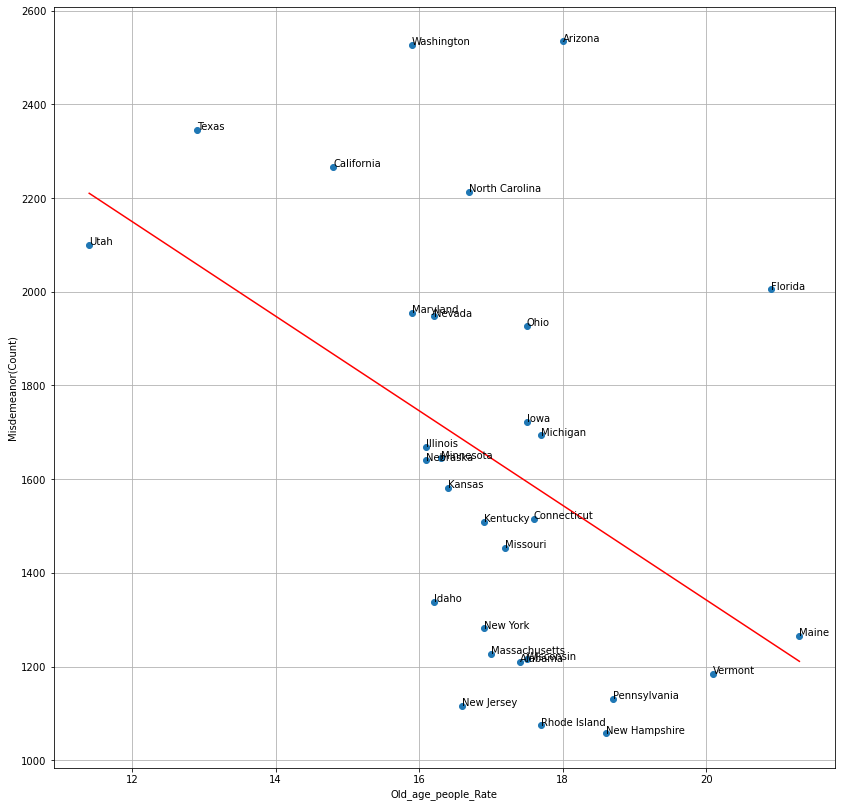

In [89]:
plt.figure(figsize=(14,14))
plt.plot(Old_age_data['older_rate'],Old_age_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Old_age_data['State']):
    plt.annotate(txt, (Old_age_data['older_rate'][i], Old_age_data['Misdemeanor_Result'][i]))


Old_age_linear=LinearRegression()
Old_age_linear.fit(Old_age_data['older_rate'].values.reshape(-1,1),Old_age_data['Misdemeanor_Result'])
Old_age_prediction=Old_age_linear.predict(Old_age_data['older_rate'].values.reshape(-1,1))
plt.plot(Old_age_data['older_rate'],Old_age_linear.predict(Old_age_data['older_rate'].values.reshape(-1,1)),color='r')

print("기울기 : ",Old_age_linear.coef_)
print("절편 : ",Old_age_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Old_age_people_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [55]:
print('score : ',Old_age_linear.score(Old_age_data['older_rate'].values.reshape(-1,1),Old_age_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Old_age_prediction,Old_age_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Old_age_prediction,Old_age_data['Misdemeanor_Result'])**0.5)

score :  0.19561922924275943
MSE :  155708.68843042792
RMSE :  394.59940247094636


In [56]:
Old_age_body=pd.DataFrame({'Misdemeanor':Old_age_data['Misdemeanor_Result'],'Old_age':Old_age_data['older_rate']})
log_Old_age_body=pd.DataFrame({'Misdemeanor':np.log(Old_age_data['Misdemeanor_Result']),'Old_age':np.log(Old_age_data['older_rate'])})

Old_age_spearmanor_corr=stats.spearmanr(Old_age_body.Old_age,Old_age_body.Misdemeanor)
log_Old_age_spearmanor_corr=stats.spearmanr(log_Old_age_body.Old_age,log_Old_age_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Old_age_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_Old_age_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.4792341789462982, pvalue=0.0073737113431139424)
log spearmanr_corr : SpearmanrResult(correlation=-0.4792341789462982, pvalue=0.0073737113431139424)


In [57]:
Old_age_pearson_corr=Old_age_body.corr(method='pearson')
Old_age_pearson_corr

,Misdemeanor,Old_age
Misdemeanor,1.000000,-0.442289
Old_age,-0.442289,1.000000


In [58]:
log_Old_age_pearson_corr=log_Old_age_body.corr(method='pearson')
log_Old_age_pearson_corr

,Misdemeanor,Old_age
Misdemeanor,1.000000,-0.458664
Old_age,-0.458664,1.000000


# Gender(Female_rate)

In [90]:
Gender_data=Data.filter(['State','Misdemeanor_Result','Female_Rate'])
Gender_data=Gender_data.sort_values(by='Female_Rate')
Gender_data=Gender_data.reset_index()
#Gender_data

기울기 :  [-270.46024037]
절편 :  15352.017815057636


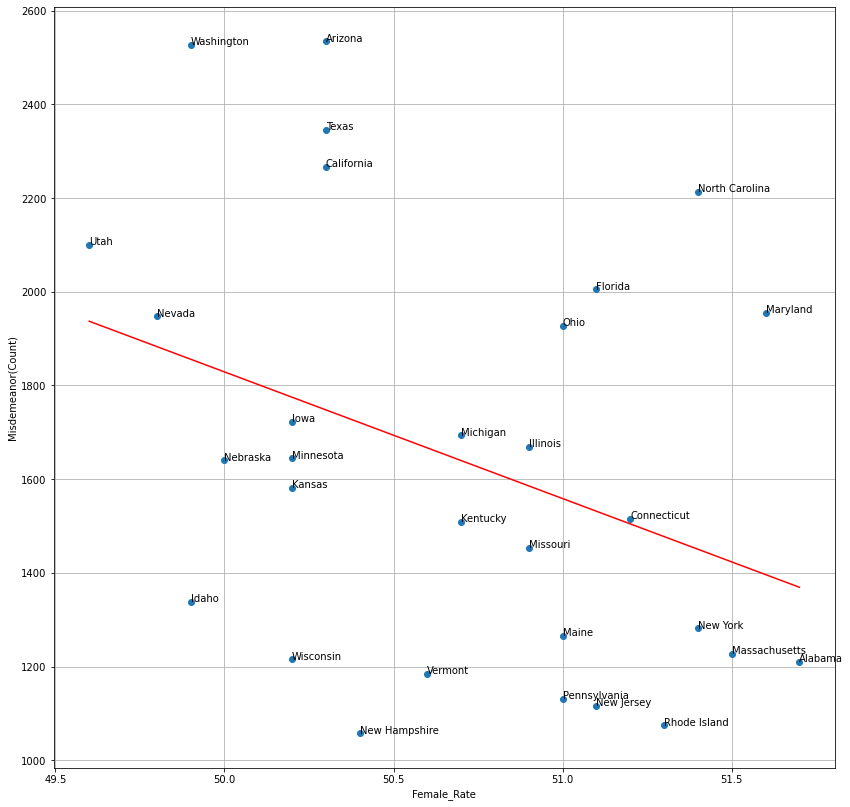

In [91]:
plt.figure(figsize=(14,14))
plt.plot(Gender_data['Female_Rate'],Gender_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Gender_data['State']):
    plt.annotate(txt, (Gender_data['Female_Rate'][i], Gender_data['Misdemeanor_Result'][i]))


Gender_linear=LinearRegression()
Gender_linear.fit(Gender_data['Female_Rate'].values.reshape(-1,1),Gender_data['Misdemeanor_Result'])
Gender_prediction=Gender_linear.predict(Gender_data['Female_Rate'].values.reshape(-1,1))
plt.plot(Gender_data['Female_Rate'],Gender_linear.predict(Gender_data['Female_Rate'].values.reshape(-1,1)),color='r')

print("기울기 : ",Gender_linear.coef_)
print("절편 : ",Gender_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Female_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [61]:
print('score : ',Gender_linear.score(Gender_data['Female_Rate'].values.reshape(-1,1),Gender_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Gender_prediction,Gender_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Gender_prediction,Gender_data['Misdemeanor_Result'])**0.5)

score :  0.12681704953894712
MSE :  169027.12859247945
RMSE :  411.1290899370652


In [62]:
Gender_body=pd.DataFrame({'Misdemeanor':Gender_data['Misdemeanor_Result'],'Female_Rate':Gender_data['Female_Rate']})
log_Gender_body=pd.DataFrame({'Misdemeanor':np.log(Gender_data['Misdemeanor_Result']),'Female_Rate':np.log(Gender_data['Female_Rate'])})

Gender_spearmanor_corr=stats.spearmanr(Gender_body.Female_Rate,Gender_body.Misdemeanor)
log_Gender_spearmanor_corr=stats.spearmanr(log_Gender_body.Female_Rate,log_Gender_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Gender_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_Gender_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.3294312163781983, pvalue=0.07545344421265422)
log spearmanr_corr : SpearmanrResult(correlation=-0.3294312163781983, pvalue=0.07545344421265422)


In [63]:
Gender_pearson_corr=Gender_body.corr(method='pearson')
Gender_pearson_corr

,Misdemeanor,Female_Rate
Misdemeanor,1.000000,-0.356114
Female_Rate,-0.356114,1.000000


In [64]:
log_Gender_pearson_corr=log_Gender_body.corr(method='pearson')
log_Gender_pearson_corr

,Misdemeanor,Female_Rate
Misdemeanor,1.000000,-0.358029
Female_Rate,-0.358029,1.000000


# Travel

In [92]:
Travel_data=Data.filter(['State','Misdemeanor_Result','Traveler_spending'])
Travel_data=Travel_data.sort_values(by='Traveler_spending')
Travel_data=Travel_data.reset_index()
#Travel_data

기울기 :  [0.00518337]
절편 :  1496.3063626245503


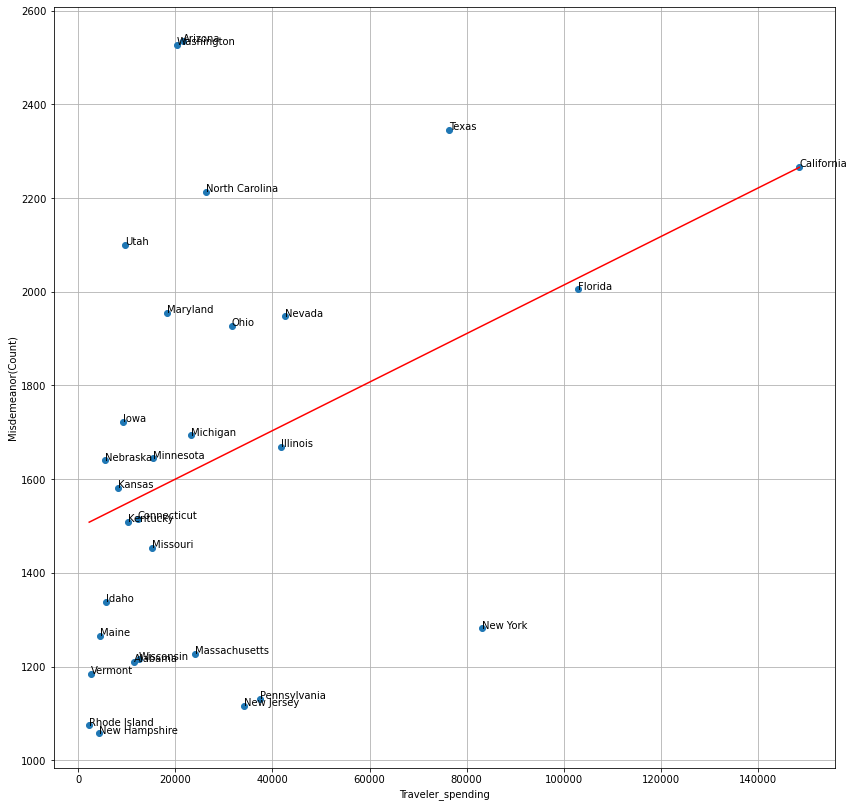

In [93]:
plt.figure(figsize=(14,14))
plt.plot(Travel_data['Traveler_spending'],Travel_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Travel_data['State']):
    plt.annotate(txt, (Travel_data['Traveler_spending'][i], Travel_data['Misdemeanor_Result'][i]))


Travel_linear=LinearRegression()
Travel_linear.fit(Travel_data['Traveler_spending'].values.reshape(-1,1),Travel_data['Misdemeanor_Result'])
Travel_prediction=Travel_linear.predict(Travel_data['Traveler_spending'].values.reshape(-1,1))
plt.plot(Travel_data['Traveler_spending'],Travel_linear.predict(Travel_data['Traveler_spending'].values.reshape(-1,1)),color='r')

print("기울기 : ",Travel_linear.coef_)
print("절편 : ",Travel_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Traveler_spending')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [67]:
print('score : ',Travel_linear.score(Travel_data['Traveler_spending'].values.reshape(-1,1),Travel_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Travel_prediction,Travel_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Travel_prediction,Travel_data['Misdemeanor_Result'])**0.5)

score :  0.14869780200710292
MSE :  164791.54341622014
RMSE :  405.9452468205782


In [68]:
Travel_body=pd.DataFrame({'Misdemeanor':Travel_data['Misdemeanor_Result'],'Traveler_spending':Travel_data['Traveler_spending']})
log_Travel_body=pd.DataFrame({'Misdemeanor':np.log(Travel_data['Misdemeanor_Result']),'Traveler_spending':np.log(Travel_data['Traveler_spending'])})

Travel_spearmanor_corr=stats.spearmanr(Travel_body.Traveler_spending,Travel_body.Misdemeanor)
log_Travel_spearmanor_corr=stats.spearmanr(log_Travel_body.Traveler_spending,log_Travel_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Travel_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_Travel_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=0.4522803114571746, pvalue=0.012095766128417288)
log spearmanr_corr : SpearmanrResult(correlation=0.4522803114571746, pvalue=0.012095766128417288)


In [69]:
Travel_pearson_corr=Travel_body.corr(method='pearson')
Travel_pearson_corr

,Misdemeanor,Traveler_spending
Misdemeanor,1.000000,0.385614
Traveler_spending,0.385614,1.000000


In [70]:
log_Travel_pearson_corr=log_Travel_body.corr(method='pearson')
log_Travel_pearson_corr

,Misdemeanor,Traveler_spending
Misdemeanor,1.000000,0.481499
Traveler_spending,0.481499,1.000000


# Temperature

In [11]:
Temper_data=Data.filter(['State','Temper','Misdemeanor_Result'])
Temper_data=Temper_data.sort_values(by='Temper')
Temper_data=Temper_data.reset_index()
#Temper_data

기울기 :  [54.13433602]
절편 :  1067.6599157980731


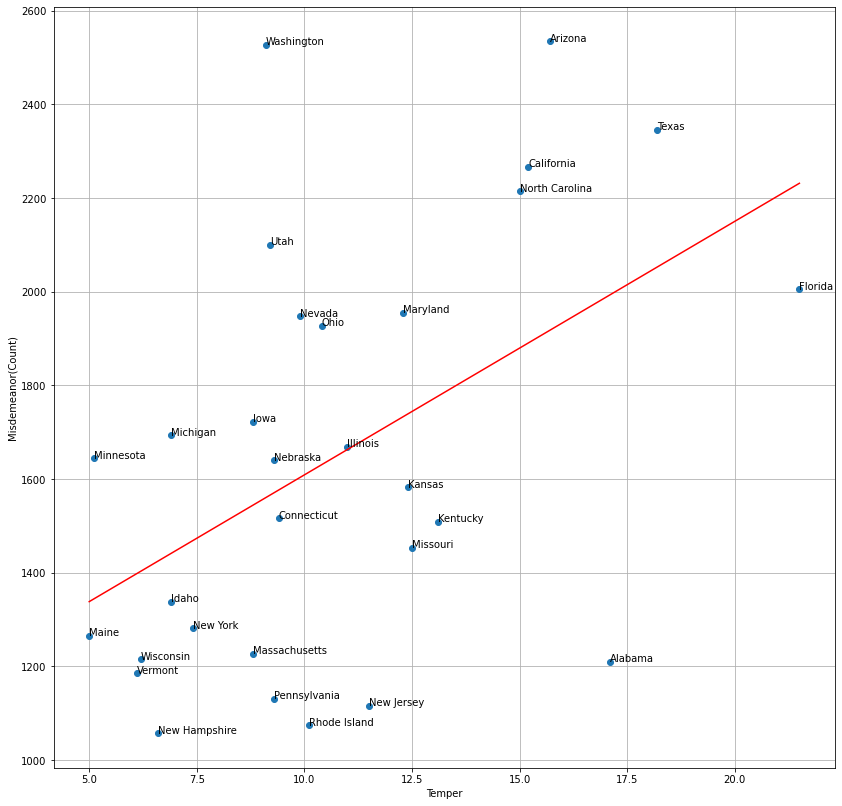

In [72]:
plt.figure(figsize=(14,14))
plt.plot(Temper_data['Temper'],Temper_data['Misdemeanor_Result'],'o')

for i, txt in enumerate(Temper_data['State']):
    plt.annotate(txt, (Temper_data['Temper'][i], Temper_data['Misdemeanor_Result'][i]))


Temper_linear=LinearRegression()
Temper_linear.fit(Temper_data['Temper'].values.reshape(-1,1),Temper_data['Misdemeanor_Result'])
Temper_prediction=Temper_linear.predict(Temper_data['Temper'].values.reshape(-1,1))
plt.plot(Temper_data['Temper'],Temper_linear.predict(Temper_data['Temper'].values.reshape(-1,1)),color='r')

print("기울기 : ",Temper_linear.coef_)
print("절편 : ",Temper_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Temper')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)

In [73]:
print('score : ',Temper_linear.score(Temper_data['Temper'].values.reshape(-1,1),Temper_data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Temper_prediction,Temper_data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Temper_prediction,Temper_data['Misdemeanor_Result'])**0.5)

score :  0.238844821195085
MSE :  147341.2578873167
RMSE :  383.85056713168564


In [74]:
Temper_body=pd.DataFrame({'Misdemeanor':Temper_data['Misdemeanor_Result'],'Temper':Temper_data['Temper']})
log_Temper_body=pd.DataFrame({'Misdemeanor':np.log(Temper_data['Misdemeanor_Result']),'Temper':np.log(Temper_data['Temper'])})

Temper_spearmanor_corr=stats.spearmanr(Temper_body.Temper,Temper_body.Misdemeanor)
#log_Temper_spearmanor_corr=stats.spearmanr(log_Temper_body.Temper,log_Temper_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Temper_spearmanor_corr))
#print('log spearmanr_corr : {}'.format(log_Temper_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=0.4239457229642254, pvalue=0.019558473940602776)


In [75]:
Temper_pearson_corr=Temper_body.corr(method='pearson')
Temper_pearson_corr

,Misdemeanor,Temper
Misdemeanor,1.000000,0.488718
Temper,0.488718,1.000000


In [76]:
log_Temper_pearson_corr=log_Temper_body.corr(method='pearson')
log_Temper_pearson_corr

,Misdemeanor,Temper
Misdemeanor,1.000000,0.478156
Temper,0.478156,1.000000


In [12]:
# 각 feature들의 최종 상관계수과 p-value 정리

List=['GDP','Education','Happy','PCPI','GDP_penalty','Area_police','MSA','Old_rate','Gender','Travel','Temperature']
Misdemeanor_spear=['0.4051','-0.5617','0.1239','-0.1973','0.5114','0.6433','0.2905','-0.4180','-0.4314','0.3412','0.4239']
pvalue_spear=['0.0263','0.0012','0.5141','0.2959','0.0038','0.00007','0.1192','0.0172','0.0136','0.0559','0.0195']

result_spear=pd.DataFrame({'Misdemeanor':Misdemeanor_spear,'p-value':pvalue_spear},index=List)
result_spear

,Misdemeanor,p-value
GDP,0.4051,0.0263
Education,-0.5617,0.0012
Happy,0.1239,0.5141
PCPI,-0.1973,0.2959
GDP_penalty,0.5114,0.0038
Area_police,0.6433,0.00007
MSA,0.2905,0.1192
Old_rate,-0.4180,0.0172
Gender,-0.4314,0.0136
Travel,0.3412,0.0559
